<a href="https://colab.research.google.com/github/ljw-0108/deep-learning-practice/blob/main/250528_rnn_attention_ipynb__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시퀀스 배열로 다루는 순환 신경망(RNN)

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

### 라이브러리 불러오기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

### 데이터셋 불러오기 및 확인

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8982,) (2246,)
(8982,) (2246,)


In [ ]:
category = np.max(y_train) + 1 # 0 ~ 45

print(f"카테고리 : {category}개")
print(f"학습용 뉴스 기사 : {len(X_train)}개")
print(f"테스트용 뉴스 기사 : {len(X_test)}개")
print(X_train[0])
print(f"토큰 개수 ex : {len(X_train[0])}, {len(X_train[1])}, {len(X_train[2])}")

카테고리 : 46개
학습용 뉴스 기사 : 8982개
테스트용 뉴스 기사 : 2246개
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
토큰 개수 ex : 87, 56, 139


### 텍스트 전처리

In [ ]:
# Padding 적용
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
print(f"토큰 개수 ex : {len(X_train[0])}, {len(X_train[1])}, {len(X_train[2])}")

토큰 개수 ex : 100, 100, 100


In [ ]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(y_train[0])

46

### 모델 생성

확인문제 1 : 빈칸에 들어갈 값을 적으세요

In [ ]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3963 - loss: 2.4396 - val_accuracy: 0.5036 - val_loss: 2.0273
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5131 - loss: 1.9057 - val_accuracy: 0.5712 - val_loss: 1.7144
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5835 - loss: 1.6219 - val_accuracy: 0.6149 - val_loss: 1.5420
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6369 - loss: 1.4202 - val_accuracy: 0.6527 - val_loss: 1.4022
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6750 - loss: 1.2644 - val_accuracy: 0.6621 - val_loss: 1.3388
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6981 - loss: 1.1605 - val_accuracy: 0.6861 - val_loss: 1.2356
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7269 - loss: 1.0695 - val_accuracy: 0.7021 - val_loss: 1.2012
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7580 - loss: 0.9626 - val_accu

### 성능 평가 및 시각화

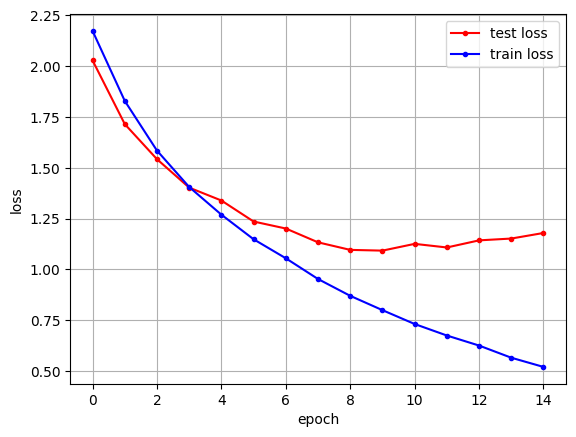

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='test loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

### 라이브러리 불러오기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

### 데이터 불러오기 및 확인

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [ ]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))

218 189 141


In [ ]:
unique, count = np.unique(y_train, return_counts=True)
print(unique, count)

[0 1] [12500 12500]


In [ ]:
unique, count = np.unique(y_test, return_counts=True)
print(unique, count)

[0 1] [12500 12500]


### 텍스트 전처리

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [ ]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))

500 500 500


### 모델 생성

In [ ]:
model = Sequential()
model.add(Embedding(5000, 50))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6571 - loss: 0.5708 - val_accuracy: 0.8643 - val_loss: 0.3293
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9008 - loss: 0.2588 - val_accuracy: 0.8869 - val_loss: 0.2717
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9256 - loss: 0.1992 - val_accuracy: 0.8816 - val_loss: 0.2892
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9398 - loss: 0.1682 - val_accuracy: 0.8898 - val_loss: 0.2789
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9458 - loss: 0.1429 - val_accuracy: 0.8866 - val_loss: 0.2972
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8759 - loss: 0.3228
Test Accuracy:  0.8779


### 성능 평가 및 시각화

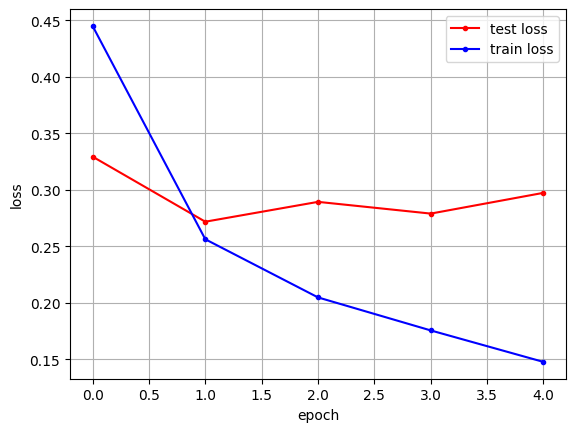

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='test loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 3 : 모델 수정 및 결과 비교
- 과적합이 발생한 이유에 대해 설명하세요
- Embedding Layer의 출력 벡터 수를 50으로 조정 후 결과를 비교해보세요

답:임베딩이 너무 과다하고 모델이 너무 복잡해 여러 레이어가 결합되어 과적합이 발생하였고 벡터수를 50으로 줄이니깐 과적합이 완화되었고 에포크가 일찍 중단되는 결과가 나타남

## 3. 어텐션을 사용한 신경망

In [ ]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=4194c90b86b656d58690d62488e70dd354ebaa4883705b77f9cb17825048ff92
  Stored in directory: /root/.cache/pip/wheels/46/f9/96/709295c836133071c12a300729fed4027757f889c01695feea
Successfully built keras-self-attention


In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model
from keras_self_attention import SeqSelfAttention

### 모델 생성

In [ ]:
att_model = Sequential()
att_model.add(Embedding(5000, 500))
att_model.add(Dropout(0.5))
att_model.add(LSTM(64, return_sequences=True))
att_model.add(SeqSelfAttention(attention_activation='sigmoid'))
att_model.add(Dropout(0.5))
att_model.add(Flatten())
att_model.add(Dense(1))
att_model.add(Activation('sigmoid'))

### 모델 학습

In [ ]:
att_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

att_history = att_model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print(f"Test Accuracy: {att_model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 154ms/step - accuracy: 0.7180 - loss: 0.4983 - val_accuracy: 0.8888 - val_loss: 0.2710
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.9265 - loss: 0.1978 - val_accuracy: 0.8948 - val_loss: 0.2577
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.9493 - loss: 0.1396 - val_accuracy: 0.8887 - val_loss: 0.2883
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 179ms/step - accuracy: 0.9642 - loss: 0.0998 - val_accuracy: 0.8831 - val_loss: 0.3504
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 178ms/step - accuracy: 0.9761 - loss: 0.0662 - val_accuracy: 0.8761 - val_loss: 0.4187
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8750 - loss: 0.4244
Test Accuracy:  0.8761


### 성능 평가 및 시각화

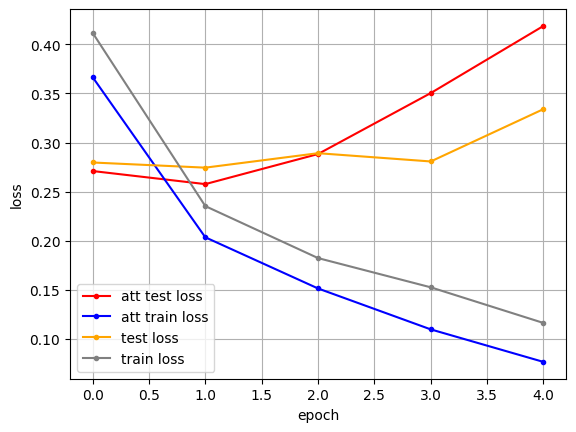

In [ ]:
att_y_vloss = att_history.history['val_loss']
att_y_loss = att_history.history['loss']

x_len = np.arange(len(att_y_loss))
plt.plot(x_len, att_y_vloss, marker='.', c="red", label='att test loss')
plt.plot(x_len, att_y_loss, marker='.', c="blue", label='att train loss')
plt.plot(x_len, y_vloss[0:5], marker='.', c="orange", label='test loss')
plt.plot(x_len, y_loss[0:5], marker='.', c="gray", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 2 : LSTM + CNN 모델과 어텐션 모델의 결과를 비교하고 이유를 설명하세요

답: 손실값의 변화폭이 어텐션 모델은 급격하게 변화하지만 LSTM + CNN 모델은 안정적으로 변화함 어텐션 모델이 LSTM + CNN 모델보다  과적합이 더 많이 일어 나기 때문에